In [1]:
%matplotlib inline
import sys
sys.path.insert(0, "../..")

In [2]:

import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt

(-0.5, 39.5, 39.5, -0.5)

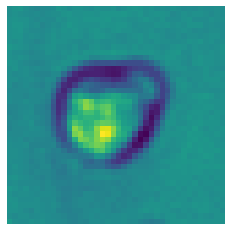

In [3]:
t, x, y, w = (251, 80, 538, 40)
training_image = dt.LoadImage(f"data/BF-C2DL-HSC/t{t:04d}.tif")()._value / 256
crop = training_image[y:y+w, x:x+w]
plt.imshow(crop)
plt.axis("off")


In [4]:

model = dt.models.AutoMultiTracker(input_shape=(None, None, 1))

train_set =   (
    dt.Value(crop)
    >> dt.Add(lambda: np.random.randn() * 0.1)
    >> dt.Gaussian(sigma=lambda:np.random.uniform(0, 0.2))  
    >> dt.Multiply(lambda: np.random.uniform(0.6, 1.2))
)
# model.model.consistency_weight = X
model.fit(
    train_set,
    epochs=30,
    batch_size=8,
)



Generating 171 / 160 samples before starting training
Epoch 1/30
171/171 [==============================] - 5s 7ms/step - total_loss: 3.0155 - consistency_loss: 1.5289
Epoch 2/30
171/171 [==============================] - 2s 10ms/step - total_loss: 2.6020 - consistency_loss: 1.3280
Epoch 3/30
171/171 [==============================] - 2s 10ms/step - total_loss: 2.0216 - consistency_loss: 1.0191
Epoch 4/30
171/171 [==============================] - 2s 10ms/step - total_loss: 1.1832 - consistency_loss: 0.7232
Epoch 5/30
171/171 [==============================] - 2s 11ms/step - total_loss: 0.9269 - consistency_loss: 0.5741
Epoch 6/30
171/171 [==============================] - 2s 10ms/step - total_loss: 0.3683 - consistency_loss: 0.1762
Epoch 7/30
171/171 [==============================] - 1s 8ms/step - total_loss: 0.1619 - consistency_loss: 0.0481
Epoch 8/30
171/171 [==============================] - 2s 10ms/step - total_loss: 0.5441 - consistency_loss: 0.1996
Epoch 9/30
171/171 [========

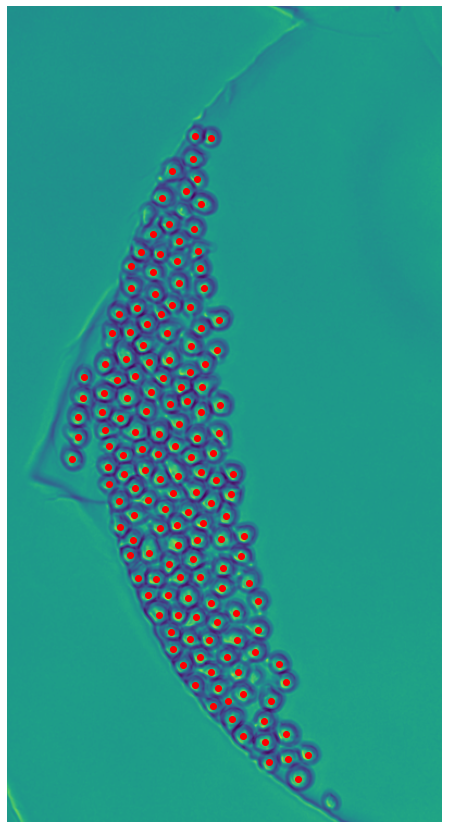

In [5]:
#May need to tune these to get optimal performance!
alpha = 0.2
cutoff = 0.99

frame_index = 1763

image = dt.LoadImage(f"data/BF-C2DL-HSC/t{frame_index:04d}.tif")()._value / 256
image = image[130:-130, :400]

detections = model.predict_and_detect(image[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")[0]
# detections = autotracker.detect(pred[0], weights[0], beta=1-alpha, alpha=alpha, cutoff=cutoff, mode="constant")

plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.axis("off")
plt.scatter(detections[:, 1], detections[:, 0], color="r")